In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [60]:
df.duplicated().sum()

937

In [61]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

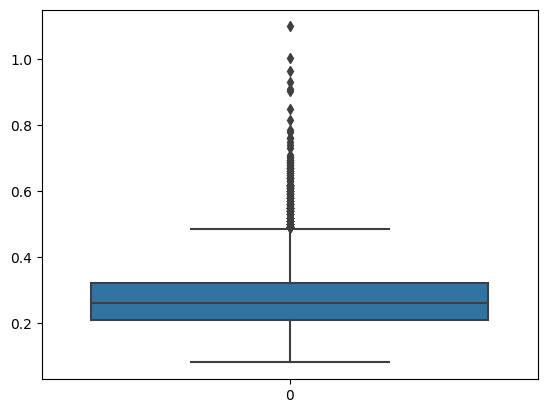

In [62]:
#sns.distplot(df['fixed acidity'])
sns.boxplot(df['volatile acidity'])

In [63]:
sul25=df['sulphates'].quantile(.25)
sul75=df['sulphates'].quantile(.75)
sulIQR=sul75-sul25
u_sul=sul75+sulIQR*3
l_sul=sul25-sulIQR*3
df['sulphates']=np.where(
df['sulphates']>u_sul,u_sul,
np.where(
df['sulphates']<l_sul,l_sul,df['sulphates']))

<Axes: >

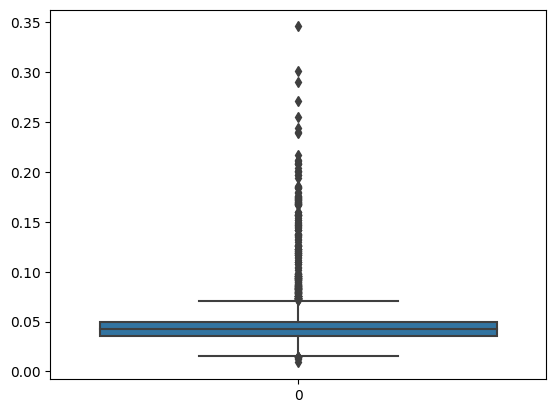

In [64]:
sns.boxplot(df['chlorides'])

In [65]:
chl25=df['chlorides'].quantile(.25)
chl75=df['chlorides'].quantile(.75)
chlIQR=chl75-chl25
u_chl=chl75+chlIQR*3
l_chl=chl25-chlIQR*3
df['chlorides']=np.where(
df['chlorides']>u_chl,u_chl,
np.where(
df['chlorides']<l_chl,l_chl,df['chlorides']))

In [66]:
X=df.drop(labels=['quality'],axis=1)
y=df.quality

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [68]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1235,7.8,0.32,0.31,1.70,0.036,46.0,195.0,0.99300,3.03,0.48,10.5
1108,6.1,0.29,0.27,1.70,0.024,13.0,76.0,0.98930,3.21,0.51,12.6
3945,6.2,0.27,0.32,6.30,0.048,47.0,159.0,0.99282,3.21,0.60,11.0
3066,7.4,0.21,0.80,12.30,0.038,77.0,183.0,0.99778,2.95,0.48,9.0
2960,7.7,0.11,0.34,14.05,0.040,41.0,114.0,0.99634,3.07,0.59,11.0


In [69]:
y_train.head()

1235    5
1108    7
3945    6
3066    5
2960    7
Name: quality, dtype: int64

In [70]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [72]:
xg=XGBClassifier()
rf=RandomForestClassifier(random_state=7)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100


72.51700680272108